<a href="https://colab.research.google.com/github/pritip22/dumbi/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/students.csv")


In [3]:
def entropy(y):
  _, counts = np.unique(y,return_counts= True)
  prob = counts/len(y)
  return -np.sum(prob * np.log2(prob))

In [21]:
def information_gain(data, attribute, target):
# Calculate entropy of the original dataset
  original_entropy = entropy(data[target])
  attribute_entropy = 0
  unique_values = data[attribute].unique()
  for value in unique_values:
    subset = data[data[attribute] == value]
    weight = len(subset) / len(data)
    attribute_entropy += weight * entropy(subset[target])

  info_gain = original_entropy - attribute_entropy
  return info_gain

target = 'Scholarship'
data = df
information_gain_dict = {}
for column in df.columns:
  if column != target:
    information_gain_dict[column] = information_gain(data, column, target)

In [23]:
for attribute, gain in information_gain_dict.items():
 print(f"Information Gain for {attribute}: {gain}")

Information Gain for Student ID: 0.954434002924965
Information Gain for Department: 0.3600730651545315
Information Gain for Marks: 0.2657121273840979
Information Gain for Age: 0.954434002924965


In [24]:
#  Decision Tree

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


In [25]:
df = df.drop(columns=['Student ID'])
encoder = LabelEncoder()
df['Department'] = encoder.fit_transform(df['Department'])
df['Marks'] = encoder.fit_transform(df['Marks'])
df['Scholarship'] = encoder.fit_transform(df['Scholarship'])

In [28]:
# Define feature and Targe variable
X = df.drop(columns =['Scholarship'])
y = df['Scholarship']

In [29]:
# Split train and test data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [30]:
# build model

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

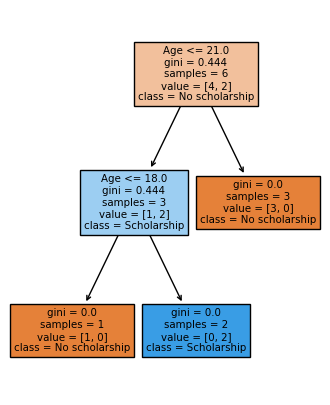

In [32]:
plt.figure(figsize = (4,5))
plot_tree(clf,filled = True, feature_names = X.columns , class_names= ['No scholarship','Scholarship'])
plt.show()